In [4]:
df=pd.read_csv('tengri_news.csv')
df

,title,url,tags,text
0,Әлемдегі ең танымал туристік бағыттар аталды,https://kaz.tengritravel.kz/around-the-world/a...,"['туризм', 'рейтинг', 'саяхат']",Tripadvisor нұсқасы бойынша Индонезияның Бали ...
1,2020 жылдың қорытындысы бойынша Қазақстан халқ...,https://kaz.tengrinews.kz/kazakhstan_news/2020...,"['қазақстан', 'халық саны']",2021 жылы елдегі халық саны 18 миллион 877 мың...
2,Қазақстандықтар 2021 жылды қарсы алып жатыр,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['мереке', 'жаңа жыл']",Қазақстандықтар 2021 жылды қарсы алып жатыр. 2...
3,2022 жылы Балқаш көлінде демалу қанша тұрады,https://kaz.tengritravel.kz/my-country/2022-jy...,"['туризм', 'балқаш', 'турист', 'саяхат']",2022 жылдың жазғы маусымында Балқаш көлінде де...
4,Тоқаев қазақстандықтарды 2022 жылы не күтіп тұ...,https://kaz.tengrinews.kz/kazakhstan_news/toka...,"['тоқаев қасым-жомарт', 'жаңа жыл']",Президент Қасым-Жомарт Тоқаев қазақстандықтард...
...,...,...,...,...
27583,Қай қалаларда жаңажылдық отшашу болады?,https://kaz.tengrinews.kz/kazakhstan_news/kay-...,"['өңір', 'мереке', 'жаңа жыл']",Оралда мерекелік отшашу 31 желтоқсан сағат 23....
27584,"Бір өңір ""жасыл"" аймақтан ""сары"" аймаққа өтті",https://kaz.tengrinews.kz/kazakhstan_news/br-o...,"['өңір', 'эпидемиологиялық жағдай', 'ақтөбе об...",15 қазандағы жағдай бойынша Қазақстан өңірлері...
27585,"Қазақстанда 4 өңір ""қызыл"" аймақта",https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'эпидемиологиялық жағдай', 'қазақстан...",Қазақстан өңірлеріндегі эпидемиологиялық ахуал...
27586,Қазақстан өңірлеріндегі білім сапасында алшақт...,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'мектеп', 'білім беру']",Білім және ғылым министрі Асхат Аймағамбетов Қ...


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter
def parse_tags(x):
    if isinstance(x,str):
        try: return ast.literal_eval(x)
        except: return []
    return []
df['tags_list']=df['tags'].apply(parse_tags)
print(df.describe)
print(df.info())
print(df.isna().sum())

<bound method NDFrame.describe of                                                    title  \
0           Әлемдегі ең танымал туристік бағыттар аталды   
1      2020 жылдың қорытындысы бойынша Қазақстан халқ...   
2            Қазақстандықтар 2021 жылды қарсы алып жатыр   
3           2022 жылы Балқаш көлінде демалу қанша тұрады   
4      Тоқаев қазақстандықтарды 2022 жылы не күтіп тұ...   
...                                                  ...   
27583            Қай қалаларда жаңажылдық отшашу болады?   
27584      Бір өңір "жасыл" аймақтан "сары" аймаққа өтті   
27585                 Қазақстанда 4 өңір "қызыл" аймақта   
27586  Қазақстан өңірлеріндегі білім сапасында алшақт...   
27587  Қазақстандағы өмір сапасы бойынша өңірлер рейт...   

                                                     url  \
0      https://kaz.tengritravel.kz/around-the-world/a...   
1      https://kaz.tengrinews.kz/kazakhstan_news/2020...   
2      https://kaz.tengrinews.kz/kazakhstan_news/kaza...   
3    

In [6]:
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('tengri_news.csv')
df=df.dropna()
kaz_stopwords=set([
    'және', 'мен', 'бірақ', 'өйткені', 'сондай', 'осы', 'сол', 'ол',
    'да', 'де', 'та', 'те', 'қарағанда', 'бойынша', 'туралы', 'үшін',
    'арқылы', 'сайын', 'кейін', 'алдын', 'жоқ', 'бар', 'болады', 'болды',
    'болатын', 'еді', 'екен', 'шығар', 'бе', 'ма', 'ба', 'не', 'немене'
])
def prep_text(text):
    if not isinstance(text, str):
        return ""
    text=text.lower()
    text=re.sub(r'[^\w\sа-яәіңғүұқөһА-ЯӘІҢҒҮҰҚӨһ]', ' ', text)
    text=re.sub(r'\d+',' ',text)
    text=re.sub(r'\s+',' ',text).strip()
    words=text.split()
    words=[w for w in words if w not in kaz_stopwords and len(w) > 2]
    return ' '.join(words)
df['clean_text'] = df['text'].astype(str).apply(prep_text)
print(f"Example of cleaned text:\n{df['clean_text'].iloc[0][:500]}")

Example of cleaned text:
tripadvisor нұсқасы индонезияның бали аралы танымал туристік бағыт болып танылды деп хабарлайды kaz tengritravel тілшісі екінші орында ұлыбритания астанасы лондон тұр әрі қарай қазақстандықтар арасында танымал дубай үшінші орын алды үздік бестікте рим париж қазақстандықтар арасында айтарлықтай танымал ыстамбұл орында пхукет орында тұр тізімді перудің оңтүстік шығысындағы куско қаласы аяқтады толық тізімді мына сілтемеден көре аласыздар tripadvisor үздік туристік бағыттарды аталым анықтады таныма


In [2]:
df

,title,url,tags,text,clean_text
0,Әлемдегі ең танымал туристік бағыттар аталды,https://kaz.tengritravel.kz/around-the-world/a...,"['туризм', 'рейтинг', 'саяхат']",Tripadvisor нұсқасы бойынша Индонезияның Бали ...,tripadvisor нұсқасы индонезияның бали аралы та...
1,2020 жылдың қорытындысы бойынша Қазақстан халқ...,https://kaz.tengrinews.kz/kazakhstan_news/2020...,"['қазақстан', 'халық саны']",2021 жылы елдегі халық саны 18 миллион 877 мың...,жылы елдегі халық саны миллион мың адам бұл өт...
2,Қазақстандықтар 2021 жылды қарсы алып жатыр,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['мереке', 'жаңа жыл']",Қазақстандықтар 2021 жылды қарсы алып жатыр. 2...,қазақстандықтар жылды қарсы алып жатыр жыл кор...
3,2022 жылы Балқаш көлінде демалу қанша тұрады,https://kaz.tengritravel.kz/my-country/2022-jy...,"['туризм', 'балқаш', 'турист', 'саяхат']",2022 жылдың жазғы маусымында Балқаш көлінде де...,жылдың жазғы маусымында балқаш көлінде демалу ...
4,Тоқаев қазақстандықтарды 2022 жылы не күтіп тұ...,https://kaz.tengrinews.kz/kazakhstan_news/toka...,"['тоқаев қасым-жомарт', 'жаңа жыл']",Президент Қасым-Жомарт Тоқаев қазақстандықтард...,президент қасым жомарт тоқаев қазақстандықтард...
...,...,...,...,...,...
27583,Қай қалаларда жаңажылдық отшашу болады?,https://kaz.tengrinews.kz/kazakhstan_news/kay-...,"['өңір', 'мереке', 'жаңа жыл']",Оралда мерекелік отшашу 31 желтоқсан сағат 23....,оралда мерекелік отшашу желтоқсан сағат жоспар...
27584,"Бір өңір ""жасыл"" аймақтан ""сары"" аймаққа өтті",https://kaz.tengrinews.kz/kazakhstan_news/br-o...,"['өңір', 'эпидемиологиялық жағдай', 'ақтөбе об...",15 қазандағы жағдай бойынша Қазақстан өңірлері...,қазандағы жағдай қазақстан өңірлеріндегі эпиде...
27585,"Қазақстанда 4 өңір ""қызыл"" аймақта",https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'эпидемиологиялық жағдай', 'қазақстан...",Қазақстан өңірлеріндегі эпидемиологиялық ахуал...,қазақстан өңірлеріндегі эпидемиологиялық ахуал...
27586,Қазақстан өңірлеріндегі білім сапасында алшақт...,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'мектеп', 'білім беру']",Білім және ғылым министрі Асхат Аймағамбетов Қ...,білім ғылым министрі асхат аймағамбетов қазақс...


## *top20 tags*

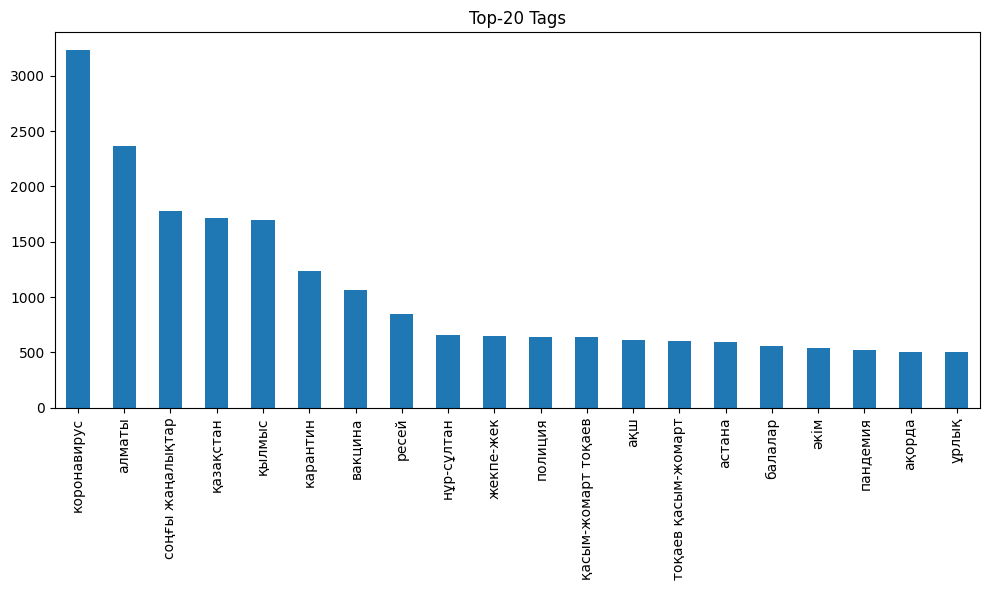

In [14]:

all_tags=[t for s in df['tags_list'] for t in s]
tag_counts=pd.Series(all_tags).value_counts().head(20)
plt.figure(figsize=(10,6))
tag_counts.plot(kind='bar')
plt.title('Top-20 Tags')
plt.tight_layout()
plt.show()

## *text length histogram*

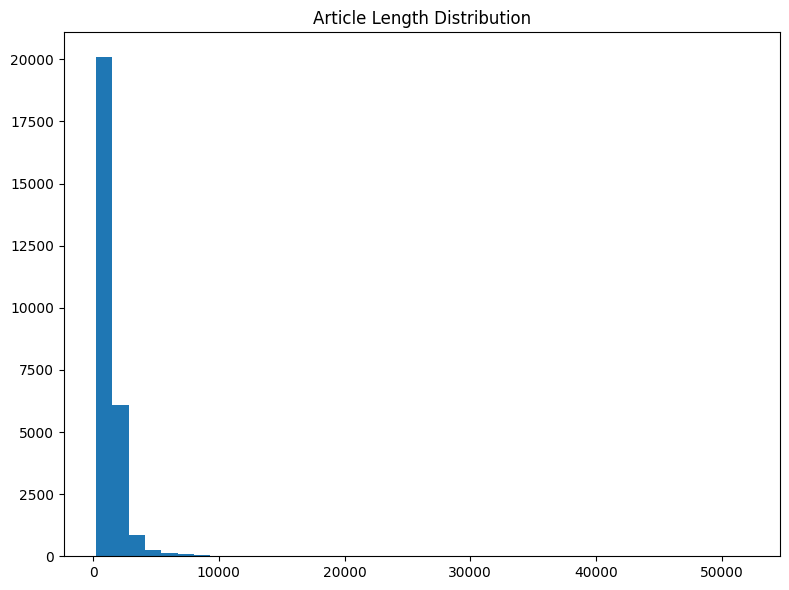

In [8]:

df['text_len']=df['clean_text'].astype(str).apply(len)
plt.figure(figsize=(8,6))
plt.hist(df['text_len'],bins=40)
plt.title('Article Length Distribution')
plt.tight_layout()
plt.show()

## *tags count per article*

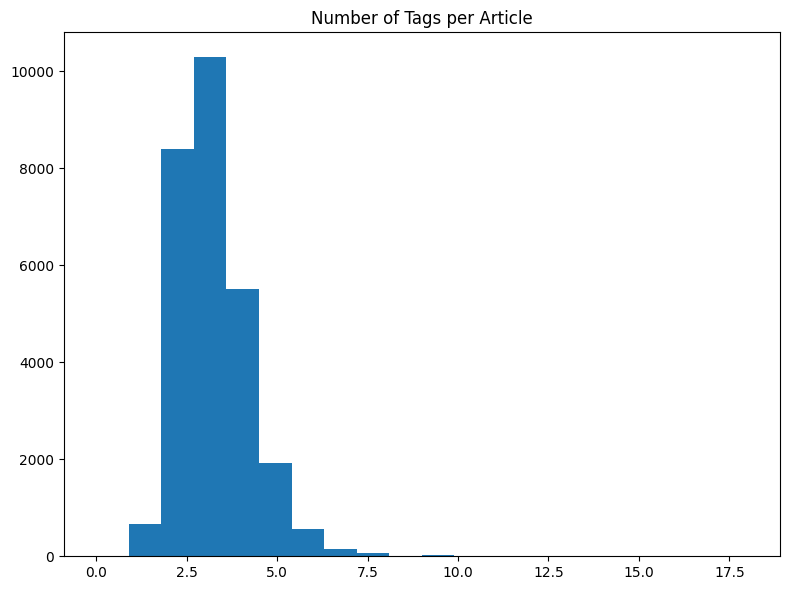

In [12]:
df['tag_count']=df['tags_list'].apply(len)
plt.figure(figsize=(8,6))
plt.hist(df['tag_count'],bins=20)
plt.title('Number of Tags per Article')
plt.tight_layout()
plt.show()


## *boxplot text length*

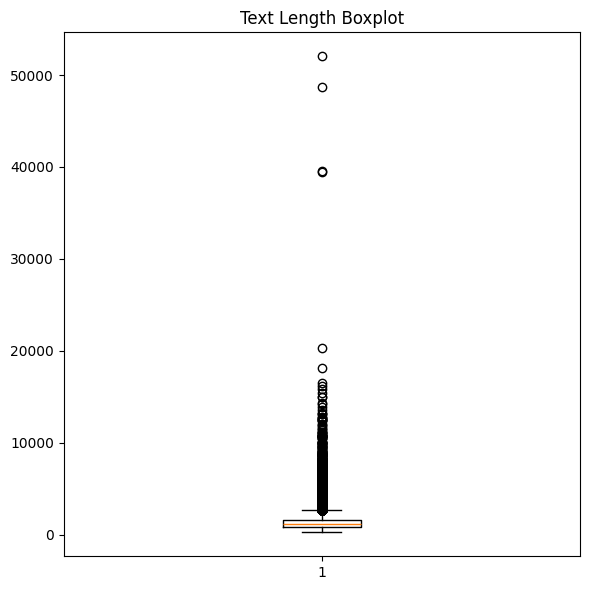

In [9]:
plt.figure(figsize=(6,6))
plt.boxplot(df['text_len'])
plt.title('Text Length Boxplot')
plt.tight_layout()
plt.show()

## *top words frequency*

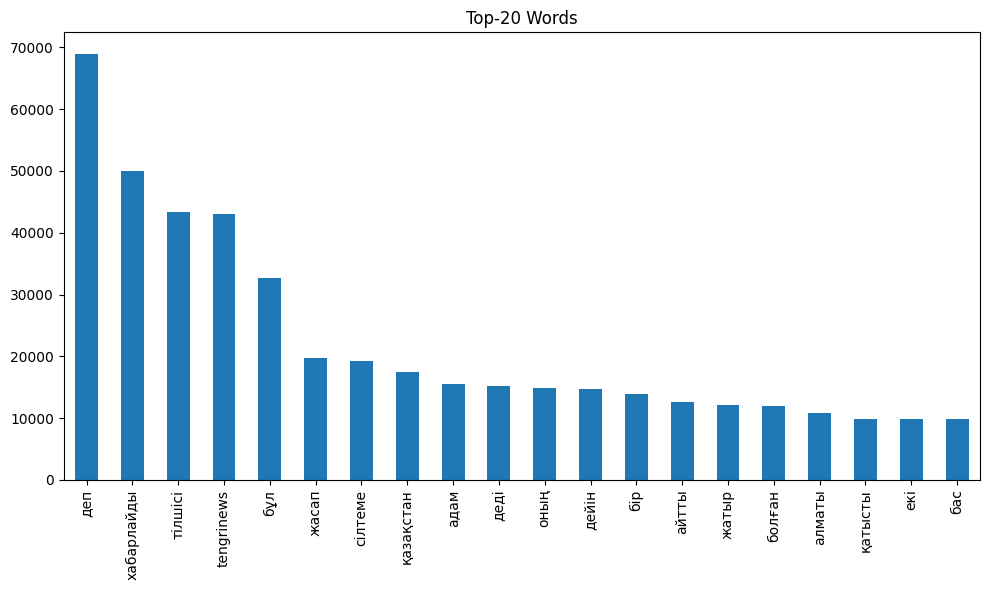

In [10]:

words=" ".join(df['clean_text'].astype(str)).lower().split()
cnt=Counter(words)
top_words=pd.Series(dict(cnt.most_common(20)))
plt.figure(figsize=(10,6))
top_words.plot(kind='bar')
plt.title('Top-20 Words')
plt.tight_layout()
plt.show()

## *scatter plot: tag_count vs text_len*

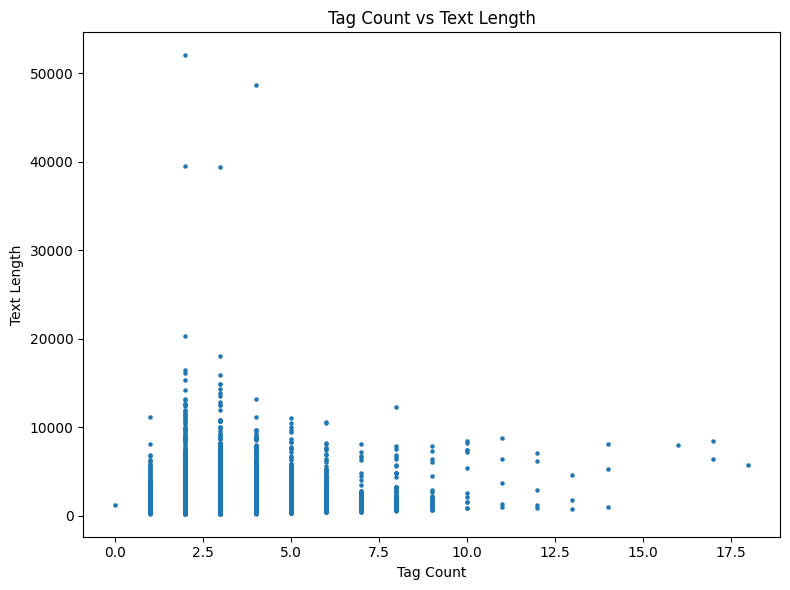

In [13]:

plt.figure(figsize=(8,6))
plt.scatter(df['tag_count'],df['text_len'],s=5)
plt.title('Tag Count vs Text Length')
plt.xlabel('Tag Count')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Саят\Downloads\tengri_news.csv")
df

,title,url,tags,text
0,Әлемдегі ең танымал туристік бағыттар аталды,https://kaz.tengritravel.kz/around-the-world/a...,"['туризм', 'рейтинг', 'саяхат']",Tripadvisor нұсқасы бойынша Индонезияның Бали ...
1,2020 жылдың қорытындысы бойынша Қазақстан халқ...,https://kaz.tengrinews.kz/kazakhstan_news/2020...,"['қазақстан', 'халық саны']",2021 жылы елдегі халық саны 18 миллион 877 мың...
2,Қазақстандықтар 2021 жылды қарсы алып жатыр,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['мереке', 'жаңа жыл']",Қазақстандықтар 2021 жылды қарсы алып жатыр. 2...
3,2022 жылы Балқаш көлінде демалу қанша тұрады,https://kaz.tengritravel.kz/my-country/2022-jy...,"['туризм', 'балқаш', 'турист', 'саяхат']",2022 жылдың жазғы маусымында Балқаш көлінде де...
4,Тоқаев қазақстандықтарды 2022 жылы не күтіп тұ...,https://kaz.tengrinews.kz/kazakhstan_news/toka...,"['тоқаев қасым-жомарт', 'жаңа жыл']",Президент Қасым-Жомарт Тоқаев қазақстандықтард...
...,...,...,...,...
27583,Қай қалаларда жаңажылдық отшашу болады?,https://kaz.tengrinews.kz/kazakhstan_news/kay-...,"['өңір', 'мереке', 'жаңа жыл']",Оралда мерекелік отшашу 31 желтоқсан сағат 23....
27584,"Бір өңір ""жасыл"" аймақтан ""сары"" аймаққа өтті",https://kaz.tengrinews.kz/kazakhstan_news/br-o...,"['өңір', 'эпидемиологиялық жағдай', 'ақтөбе об...",15 қазандағы жағдай бойынша Қазақстан өңірлері...
27585,"Қазақстанда 4 өңір ""қызыл"" аймақта",https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'эпидемиологиялық жағдай', 'қазақстан...",Қазақстан өңірлеріндегі эпидемиологиялық ахуал...
27586,Қазақстан өңірлеріндегі білім сапасында алшақт...,https://kaz.tengrinews.kz/kazakhstan_news/kaza...,"['өңір', 'мектеп', 'білім беру']",Білім және ғылым министрі Асхат Аймағамбетов Қ...
